In [49]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
top_irregular_x = np.array([0, 1, 0.5, 0.875, 0.75,  0.625, 0.375, 0.25, 0.125])
u1_irr = u_disp(top_irregular_x,0.5)
u2_irr = w_disp(top_irregular_x,0.5)
# print(u1_irr)
# print(u2_irr)
bottom_nodes_x = np.array([0, 0.5, 1, 0.125, 0.25, 0.375, 0.625, 0.75, 0.875])
u1_b = u_disp(bottom_nodes_x, -0.5)
u2_b = w_disp(bottom_nodes_x, -0.5)
print(u1_b)
print(u2_b)

[0.00000e+00 1.80500e-05 3.61000e-05 4.51250e-06 9.02500e-06 1.35375e-05
 2.25625e-05 2.70750e-05 3.15875e-05]
[4.700e-05 6.310e-04 1.215e-03 1.930e-04 3.390e-04 4.850e-04 7.770e-04
 9.230e-04 1.069e-03]


In [69]:
# definition of analytical solution of Displacement BCs
def u_disp(x,z): 
    s13 = -7.22 * 10**(-6)
    sigma_0 = -5
    d15 = 584 * 10**(-9)
    V_0 = 1000
    s33 = 18.8 * 10**(-6)
    L = 1
    u = s13*sigma_0*x
    return u 

def w_disp(x,z): 
    s13 = -7.22 * 10**(-6)
    sigma_0 = -5
    d15 = 584 * 10**(-9)
    V_0 = 1000
    s33 = 18.8 * 10**(-6)
    L = 1
    h = 0.5
    w = (d15*V_0*x)/h + s33*sigma_0*z
    return w 
    
def phi_disp(x,z): 
    s13 = -7.22 * 10**(-6)
    sigma_0 = -5
    d15 = 584 * 10**(-9)
    V_0 = 1000
    s33 = 18.8 * 10**(-6)
    L = 1
    phi = V_0 * (1 - 2 * (x/L))
    return phi
    

In [63]:
top_nodes = np.linspace(73, 81, 9, endpoint=True)
y_top = 0.5 
x_top = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1])
bottom_nodes= np.linspace(1,9,9, endpoint=True)
u_1 = u_disp(x_top, y_top)
v_1 = w_disp(x_top, y_top)
phi_1 = phi_disp(x_top, y_top)
print(phi_1)
y_bottom = -0.5
x_bottom = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1])
u_2 = u_disp(x_bottom, y_bottom)
v_2 = w_disp(x_bottom, y_bottom)
phi_2 = phi_disp(x_bottom, y_bottom)


[ 1000.   750.   500.   250.     0.  -250.  -500.  -750. -1000.]


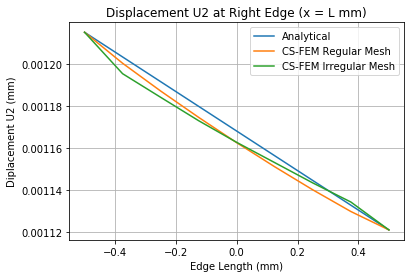

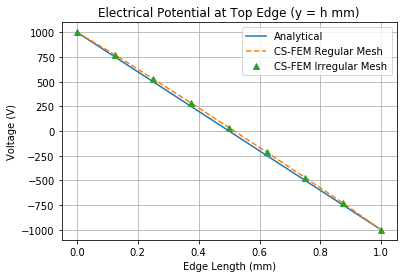

In [101]:
# Right nodes Fine 
y_right_fine = np.array([-0.5, -0.375, -0.25, -0.125, 0, 0.125, 0.25, 0.375, 0.5])
u2_right = w_disp(x_right, y_right_fine)
y_right_irregular = np.array([0.001215, 0.00119529, 0.001184067, 0.001172926, 0.001162628, 0.001152988, 0.001143334, 0.001134265, 0.001121])

df = pd.read_csv('disp_U2_Shear.csv', skipinitialspace=False,index_col=None)
# df.head()
# df['y_cafem_U2']
plt.plot(y_right_fine, u2_right, label='Analytical')
plt.plot(y_right_fine,df['y_cafem_U2'], label='CS-FEM Regular Mesh')
plt.plot(y_right_fine, y_right_irregular, label='CS-FEM Irregular Mesh')
plt.title('Displacement U2 at Right Edge (x = L mm)')
plt.xlabel('Edge Length (mm)')
plt.ylabel('Diplacement U2 (mm)')
plt.grid()
plt.legend()

# plt.savefig('Disp_U2_right_Shear.png')
plt.show()


# plt.plot(y_right_fine, u2_right-df['y_cafem_U2'])
# plt.show()

PHi_Obtained=np.array([1000., 772, 529, 284, 35, -216, -472, -730, -1000])
phi_irr = np.array([1000,772, 529, 284, 35.71, -216, -472, -730 ,-1000])
plt.plot(x_top, phi_1, label = 'Analytical')
plt.plot(x_top,PHi_Obtained,'--',label = 'CS-FEM Regular Mesh')
plt.plot(x_top, phi_irr, '^',label = 'CS-FEM Irregular Mesh')
plt.title('Electrical Potential at Top Edge (y = h mm)')
plt.xlabel('Edge Length (mm)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.legend()
plt.savefig('Electrical_Potential_Shear.png')
plt.show()
